In [4]:
import pandas_datareader as pdr

In [5]:
df=pdr.get_data_tiingo('AAPL',api_key='39b77e56be04264820e46c2902349c98851cc580')

C:\Users\Ujjwal Dash\AppData\Roaming\Python\Python37\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [6]:
df.to_csv('AAPL.csv')

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-17 00:00:00+00:00,217.88,222.95,217.27,222.15,37195133,52.163924,53.377763,52.017881,53.186230,148780532,0.0,1.0
1,AAPL,2018-09-18 00:00:00+00:00,218.24,221.85,217.12,217.79,31571712,52.250114,53.114405,51.981968,52.142377,126286848,0.0,1.0
2,AAPL,2018-09-19 00:00:00+00:00,218.37,219.62,215.30,218.50,27123833,52.281238,52.580508,51.546231,52.312362,108495332,0.0,1.0
3,AAPL,2018-09-20 00:00:00+00:00,220.03,222.28,219.15,220.24,26608794,52.678668,53.217354,52.467982,52.728946,106435176,0.0,1.0
4,AAPL,2018-09-21 00:00:00+00:00,217.66,221.36,217.29,220.78,96246748,52.111253,52.997091,52.022669,52.858230,384986992,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-09-11 00:00:00+00:00,179.36,180.300,177.34,180.07,58953052,179.36,180.300,177.34,180.07,58953052,0.0,1.0
1254,AAPL,2023-09-12 00:00:00+00:00,176.30,180.130,174.82,179.49,90370192,176.30,180.130,174.82,179.49,90370192,0.0,1.0
1255,AAPL,2023-09-13 00:00:00+00:00,174.21,177.300,173.98,176.51,84267928,174.21,177.300,173.98,176.51,84267928,0.0,1.0
1256,AAPL,2023-09-14 00:00:00+00:00,175.74,176.100,173.58,174.00,60895757,175.74,176.100,173.58,174.00,60895757,0.0,1.0
1257,AAPL,2023-09-15 00:00:00+00:00,175.01,176.495,173.82,176.48,109259461,175.01,176.495,173.82,176.48,109259461,0.0,1.0


In [5]:
df.shape

(1258, 14)

In [6]:
df2=df.reset_index()['close']

In [7]:
df2.shape

(1258,)

In [8]:
df2

0       217.88
1       218.24
2       218.37
3       220.03
4       217.66
         ...  
1253    179.36
1254    176.30
1255    174.21
1256    175.74
1257    175.01
Name: close, Length: 1258, dtype: float64

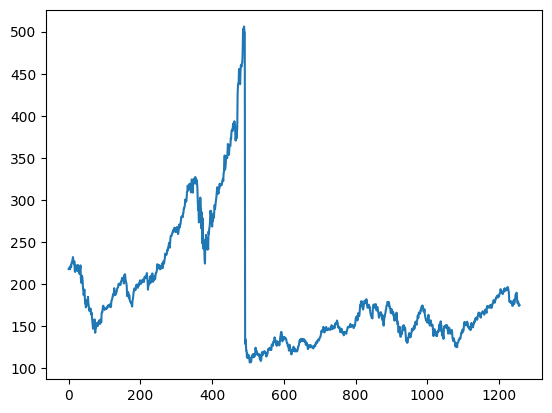

In [9]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [10]:
### LSTM are sensitive to the scale of data. so we apply MinMax scaler

In [11]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [14]:
df2.shape

(1258, 1)

In [15]:
df2

array([[0.27812148],
       [0.27902317],
       [0.27934878],
       ...,
       [0.16874139],
       [0.17257358],
       [0.17074515]])

In [16]:
### splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [17]:
train_data.shape

(817, 1)

In [18]:
test_data.shape

(441, 1)

In [19]:
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [20]:
#reshape into x=t,t+1,t+2,.....,t+100 and y=t+101
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [21]:
print(x_train)

[[0.27812148 0.27902317 0.27934878 ... 0.16881653 0.16055103 0.15922354]
 [0.27902317 0.27934878 0.28350657 ... 0.16055103 0.15922354 0.15676894]
 [0.27934878 0.28350657 0.27757044 ... 0.15922354 0.15676894 0.1604258 ]
 ...
 [0.08919224 0.09845961 0.09658109 ... 0.1377583  0.14647464 0.16115216]
 [0.09845961 0.09658109 0.10008766 ... 0.14647464 0.16115216 0.17092048]
 [0.09658109 0.10008766 0.10449593 ... 0.16115216 0.17092048 0.16961803]]


In [22]:
x_train.shape,y_train.shape

((716, 100), (716,))

In [23]:
x_test.shape,y_test.shape

((340, 100), (340,))

In [24]:
#reshape input to be [sample,time step,features] which is required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

Create the stack LSTM model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 159ms/step - loss: 0.0500 - val_loss: 0.0040
Epoch 2/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0138 - val_loss: 9.3090e-04
Epoch 3/100
12/12 [==============================] - 1s 87ms/step - loss: 0.0107 - val_loss: 3.6256e-04
Epoch 4/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0091 - val_loss: 7.6859e-04
Epoch 5/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0079 - val_loss: 4.2575e-04
Epoch 6/100
12/12 [==============================] - 1s 93ms/step - loss: 0.0074 - val_loss: 5.9236e-04
Epoch 7/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0062 - val_loss: 3.5884e-04
Epoch 8/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0064 - val_loss: 0.0011
Epoch 9/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0052 - val_loss: 4.7883e-04
Epoch 10/100
12/12 [==============================] - 1s 87ms/step - lo

In [37]:
#Lets Do the prediction and check performance matrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 18ms/step


In [38]:
#Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
#calculate RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

224.18992502399394

In [40]:
#For test data
math.sqrt(mean_squared_error(y_test,test_predict))

161.2241803909904

Plotting

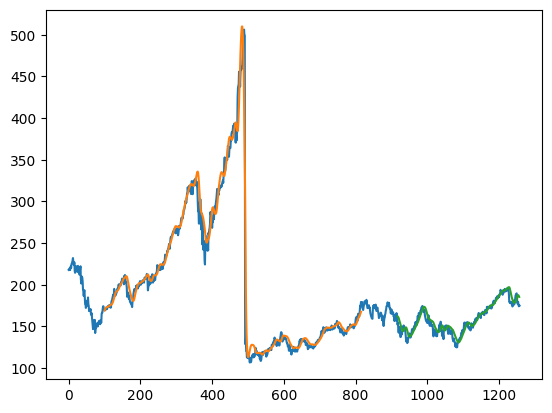

In [45]:
#shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df2)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

#shift test prediction for plotting
testPredictPlot=np.empty_like(df2)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :]=test_predict

#plot baseline and prediction
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
len(test_data)

441

In [48]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

Predict data for next 30 days

In [50]:
lst_output=[]
n_step=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_step,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_step,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)
        

[0.19005203]
101
1 day input [0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179
 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308
 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966
 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584
 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264
 0.17871008 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247
 0.1682154  0.16944271 0.17282405 0.17630557 0.18604884 0.17417658
 0.17976205 0.18371947 0.19356293 

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [52]:
len(df2)

1258

In [53]:
df3=df2.tolist()
df3.extend(lst_output)

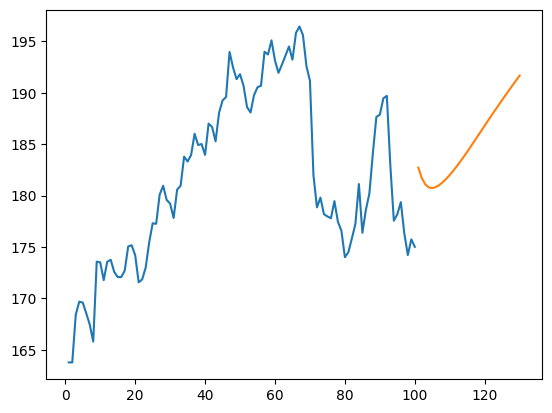

In [56]:
plt.plot(day_new,scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

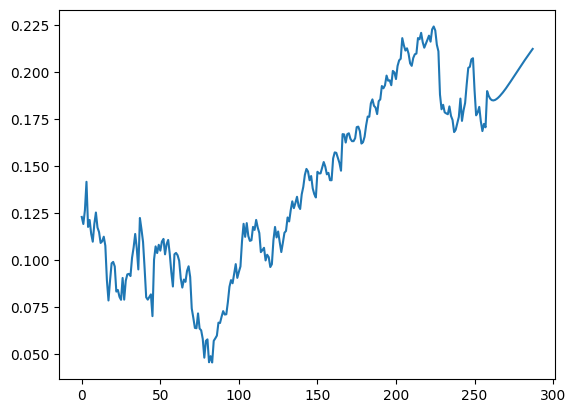

In [66]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

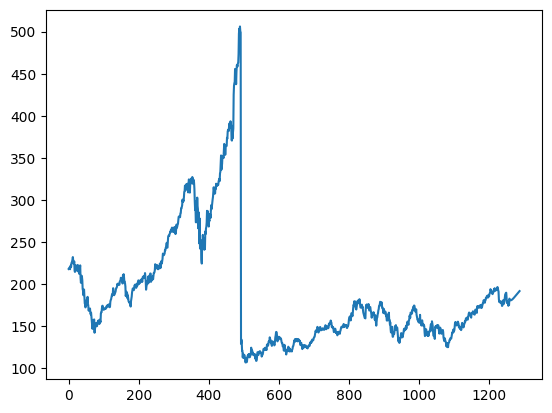

In [67]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)